# Hackathon Notebook

## Image Classification

### Import libraries

In [1]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import cv2

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
import seaborn as sns
from collections import Counter

2023-06-03 15:17:01.519802: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = 'data'

### Get the categories of drugs 

In [3]:
categories = os.listdir(data_dir)

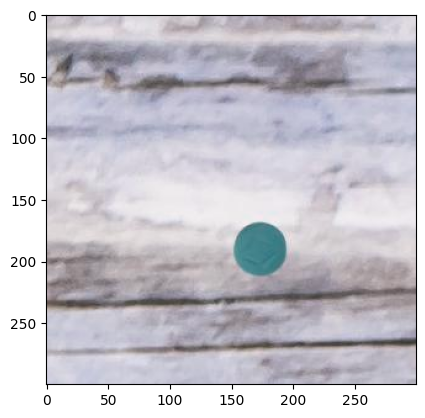

In [4]:
# Test that the image can be loaded using OpenCV

for category in categories: 
    path = os.path.join(data_dir,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show() 
        break
    break

### Set image size for all images

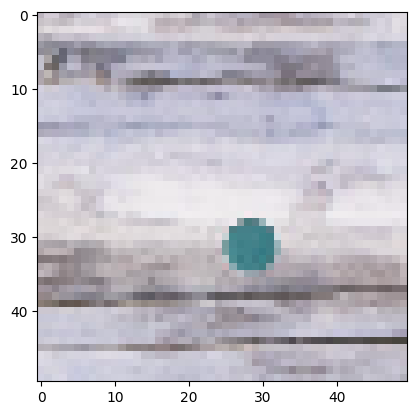

In [5]:
IMG_SIZE = 50 # @ param

# resize all images to the same size
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
# Initialise empty array for tranining dataset
training_data = []
from tqdm import tqdm

def create_training_data():
    for category in categories: 
        path = os.path.join(data_dir,category)
        class_num = categories.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])# write the modified images to the training data
            except Exception as e: 
                pass

In [7]:
create_training_data()

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1159.87it/s]


### Create dictionary to store labels and visualise the breakdown of data

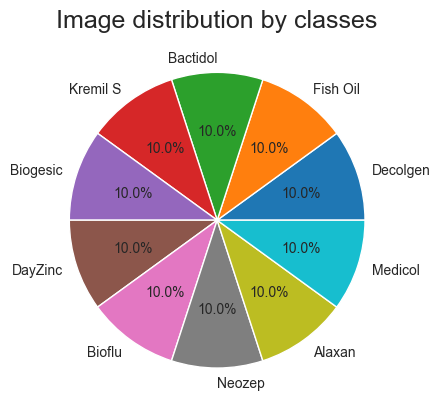

In [8]:
categories_dict = {}
# label the categories of drugs 
for i in range(10):
    categories_dict[i] = categories[i]
    
# Convert to numpy array for usage
values = np.array(training_data, dtype=object)[:, 1]
counter = Counter(values)
data = pd.DataFrame(data={'Values': counter.values(), 'Category' : categories_dict.values()})

# Plot pie chart to visualise the breakdown of the dataset
sns.set_style("darkgrid")
plt.pie(data['Values'], labels=data['Category'], autopct='%1.1f%%')
plt.title('Image distribution by classes', size=18)
plt.show()

### Create the training variables

In [9]:
X = []
y = []

# Cleaning the data into X, y for traning
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)


### Split the dataset for training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalise and label

In [11]:
# Normalise the X RGB image data
X_train = X_train / 255
X_test = X_test / 255

# Change the data to a categorical format from label
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

### Construct the CNN Model

In [12]:
# Build CNN Model
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(50, 50, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2), # add dropout to prevent overfitting
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2), # add dropout to prevent overfitting
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2), # add dropout to prevent overfitting
    Dense(10,  activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

In [14]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [15]:
epochs = 15
hist = model.fit(X_train, y_train_cat, batch_size=32, epochs=epochs, validation_split=0.2)

Epoch 1/15
200/200 [==============================] - 33s 157ms/step - loss: 2.3386 - accuracy: 0.1056 - val_loss: 2.3134 - val_accuracy: 0.1031
Epoch 2/15
200/200 [==============================] - 32s 160ms/step - loss: 2.1005 - accuracy: 0.1800 - val_loss: 2.0443 - val_accuracy: 0.1988
Epoch 3/15
200/200 [==============================] - 33s 163ms/step - loss: 1.8095 - accuracy: 0.2736 - val_loss: 1.7928 - val_accuracy: 0.2887
Epoch 4/15
200/200 [==============================] - 32s 159ms/step - loss: 1.6282 - accuracy: 0.3514 - val_loss: 1.5584 - val_accuracy: 0.3900
Epoch 5/15
200/200 [==============================] - 32s 161ms/step - loss: 1.3972 - accuracy: 0.4397 - val_loss: 1.3497 - val_accuracy: 0.4263
Epoch 6/15
200/200 [==============================] - 32s 160ms/step - loss: 1.1733 - accuracy: 0.5416 - val_loss: 1.2942 - val_accuracy: 0.5319
Epoch 7/15
200/200 [==============================] - 33s 165ms/step - loss: 0.8780 - accuracy: 0.6556 - val_loss: 0.9862 - val_ac

### Plot the accuracies to visualise the efficacy of the model

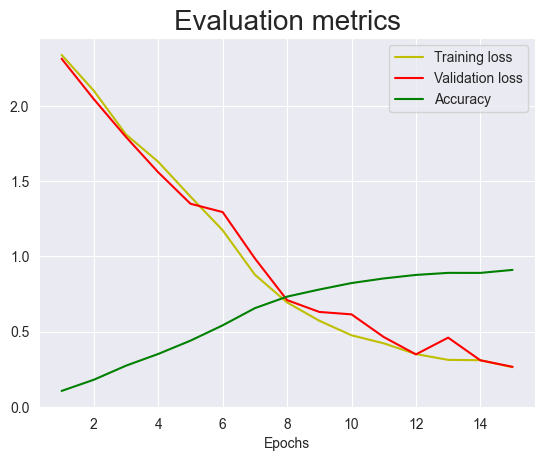

In [30]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.plot(epochs, accuracy, 'g', label='Accuracy')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [31]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

63/63 [==============================] - 2s 35ms/step


### Measure the accuracy of the model

In [32]:
print ("Accuracy = ", metrics.accuracy_score(y_test, predictions))

Accuracy =  0.9195


### Confusion Matrix to evaluate the performace of our model

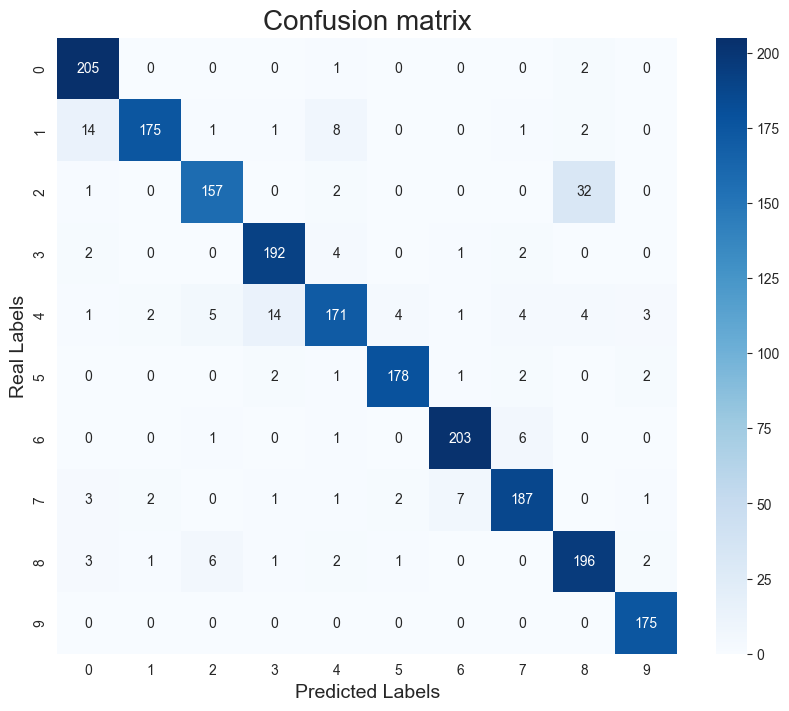

In [33]:
# Visualise how our model performed
cm = confusion_matrix(y_test, predictions)

ax = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Real Labels', size=14)
plt.show()

### See the predictions for some validation images

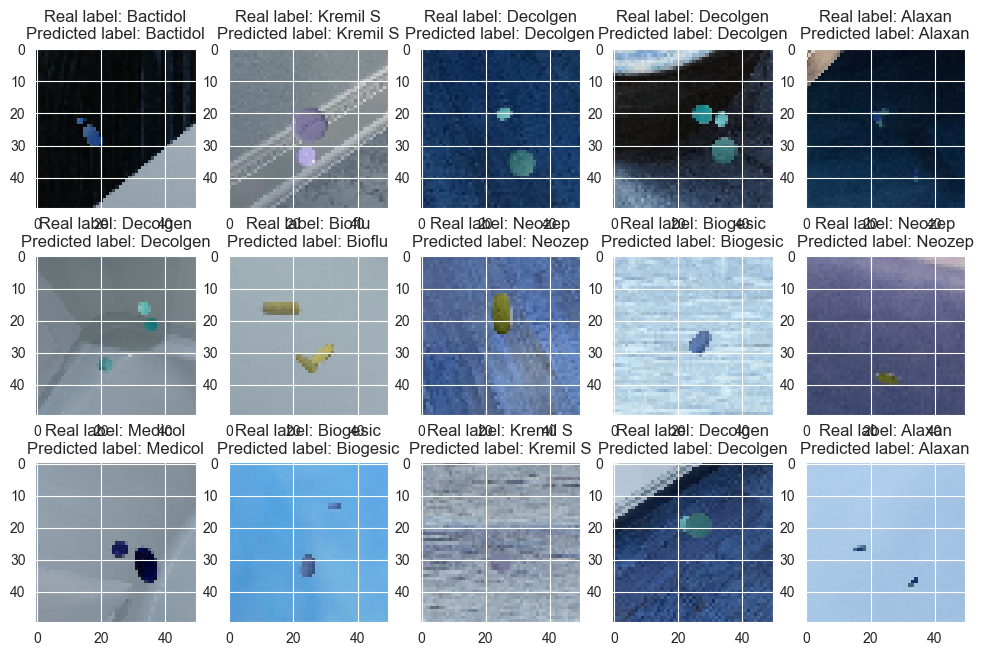

In [34]:
# Check the accuracy of the model for some images

plt.figure(figsize=(12,13))
for i in range(15):
    j = random.randint(0, X_test.shape[0] - 1)
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[j])
    plt.title('Real label: ' + categories_dict[y_test[j]] + '\n' + 'Predicted label: ' + categories_dict[predictions[j]])

### Save the model

In [35]:
model.save('model.h5')

### Define a function to test new images from the Internet

In [36]:
import cv2
import numpy as np

def predict_single_image(image_path, model, categories_dict):
    # Read the image
    img = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if img is None:
        print("Failed to load image:", image_path)
        return

    # Preprocess the image (resize, normalize, etc.)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0

    # Make prediction for the preprocessed image
    prediction = model.predict(np.expand_dims(img, axis=0))
    class_index = np.argmax(prediction)
    class_label = categories_dict[class_index]
    confidence = prediction[0][class_index]
    
    if confidence < 0.5:
        print("Sorry, we are unable to detect this image")
    
    else:# Display the image and predicted label
        plt.imshow(img)
        plt.title(f'Predicted label: {class_label}\nConfidence: {confidence:.2f}')
        plt.axis('off')
        plt.show()
        
    return class_label, class_index


### Check if the prediction is accurate

1/1 [==============================] - 0s 22ms/step


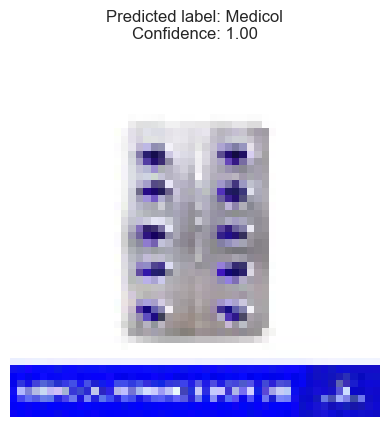

In [37]:
image_path = 'test/medicol.jpg'
class_label, class_index  = predict_single_image(image_path, model, categories_dict)

## Medical Advisory based on their pill.

In [38]:
df = pd.read_csv('data.csv')

df.head()

,Medicine,usage,indications,ingredients,type,administration,effects,precautions
0,Decolgen,Cold and flu relief,"Nasal congestion, fever","Phenylephrine, Paracetamol, Chlorphenamine","Tablet, syrup",Oral,"Drowsiness, dry mouth, dizziness",Not suitable for individuals with certain medi...
1,Fish Oil,Dietary supplement,Omega-3 fatty acid deficiency,Omega-3 fatty acids,Capsule,Oral,"Fishy aftertaste, stomach discomfort",Not suitable for individuals with fish or seaf...
2,Bactidol,Mouthwash,Oral and throat infection,Hexetidine,Mouthwash solution,Gargle,Temporary numbness of the mouth and throat,"Avoid swallowing, for external use only"
3,Kremil S,Antacid,"Hyperacidity, indigestion","Aluminum Hydroxide, Magnesium Hydroxide, Simet...",Tablet,Oral,"Constipation, diarrhea, stomach cramps",Not suitable for individuals with kidney problems
4,Biogesic,Pain relief medication,"Headache, fever",Paracetamol,"Tablet, syrup",Oral,NaN,Not suitable for individuals with liver problems


### Data Cleaning

In [39]:
df.isnull().sum().sort_values(ascending=False)

effects           1
Medicine          0
usage             0
indications       0
ingredients       0
type              0
administration    0
precautions       0
dtype: int64

In [40]:
df.dropna(subset=["effects"], axis=0, inplace= True) 

In [41]:
df.isnull().sum()

Medicine          0
usage             0
indications       0
ingredients       0
type              0
administration    0
effects           0
precautions       0
dtype: int64

### Usage

In [42]:
df.loc[df.Medicine == class_label]

,Medicine,usage,indications,ingredients,type,administration,effects,precautions
9,Medicol,Pain relief medication,"Headache, body pain, fever",Ibuprofen,"Tablet, capsule",Oral,"Upset stomach, dizziness, rash",Not suitable for individuals with ulcers or bl...


In [43]:
query = input("Enter what type of help you require: ")

Enter what type of help you require: What are some precautions I should take?


In [44]:
header = ['effects', 'usage', 'indications', 'ingredients', 'type', 'adminstration', 'precautions']
found = False

for i in range(len(header)):
    if 'price' in query.lower():
        print("Sorry, please visit your nearest pharmacy for the price.")
    if header[i] in query.lower():
        found = True
        service = header[i]
        break
        
if found == False:
    print("We are unable to assist on that matter")

In [45]:
if found == True:
    output = df.loc[class_index, service]

    print(f"The {service} for the drug {class_label} are as follows: \n \n{output}")
    print("Please consult a doctor for more information")
else:
    print("We are unable to assist on that matter")

The precautions for the drug Medicol are as follows: 
 
Not suitable for individuals with ulcers or bleeding disorders
Please consult a doctor for more information


### Lifestyle recommendation

In [46]:
import openai

In [49]:
openai.api_key = "{your_api_key}"

response = openai.ChatCompletion.create(
    model = 'gpt-3.5-turbo', #GPT-4
    temperature = 1,
    messages = [{'role': 'system', 'content': "You are a helpful assistant that helps people with their medical needs."},
                {'role': 'user', 'content': f'What are 2 lifestyle recommendations to aid recoveery for a man taking  {class_label}'},
                {'role': 'assistant', 'content': f" {class_label} is a drug that is used to treat {df.loc[class_index, 'indications']}"},
                {'role': 'user', 'content': "Show 2 lifestyle recommendations to help with the side effects of the drug"},
                ]
)
print(response)

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Some possible lifestyle recommendations to help manage the side effects of Medicol are:\n\n1. Stay hydrated: Drinking plenty of water can help flush the drug out of the body and reduce the risk of developing kidney problems. It can also help relieve the symptoms of headaches and keep the body cool during a fever.\n\n2. Avoid alcohol and smoking: Both alcohol and smoking can irritate the stomach lining and interfere with the liver's ability to process the drug properly. This can increase the risk of stomach ulcers, gastrointestinal bleeding, and liver damage. Moreover, smoking can worsen the symptoms of respiratory infections and make it harder for the body to heal. So, it is recommended to avoid alcohol and smoking while taking Medicol.",
        "role": "assistant"
      }
    }
  ],
  "created": 1685777524,
  "id": "chatcmpl-7NG20WTC0WgBkHhN4dV7ctMs3dUiH",
  "model": "gpt-3.

In [53]:
print(response["choices"][0]["message"]["content"])
print("\nPlease consult a doctor for more accurate diagnosis")

Some possible lifestyle recommendations to help manage the side effects of Medicol are:

1. Stay hydrated: Drinking plenty of water can help flush the drug out of the body and reduce the risk of developing kidney problems. It can also help relieve the symptoms of headaches and keep the body cool during a fever.

2. Avoid alcohol and smoking: Both alcohol and smoking can irritate the stomach lining and interfere with the liver's ability to process the drug properly. This can increase the risk of stomach ulcers, gastrointestinal bleeding, and liver damage. Moreover, smoking can worsen the symptoms of respiratory infections and make it harder for the body to heal. So, it is recommended to avoid alcohol and smoking while taking Medicol.

Please consult a doctor for more accurate diagnosis
